In [1]:
## End-to-End project to build a classification model, to recognize the handwritten digits

In [2]:
!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2632 sha256=23482d94c78ae9a7461d8a4104b90eedea14b8c624c9ee3176a8c31f0c4983b9
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [3]:
# Import the modules

from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report


In [4]:
Data = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
Data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [6]:
Train,Test = Data

In [7]:
Train

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [8]:
len(Train)

2

In [9]:
X_train,Y_train = Train

In [10]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
X_train[0].shape

(28, 28)

In [14]:
len(Test)

2

In [15]:
X_test,Y_test = Test

In [16]:
len(X_train)

60000

In [17]:
len(X_test)

10000

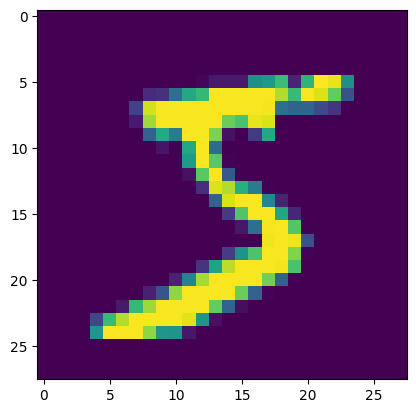

In [18]:
plt.imshow(X_train[0])

In [19]:
Y_train[0]

5

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  97  96  77 118  61   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  90 138 235 235 235 235 235 235 251 251 248 254 24

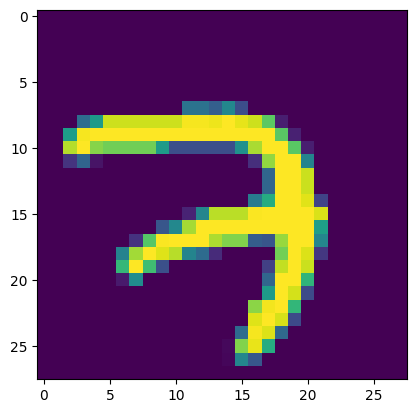

In [20]:
plt.imshow(X_train[5000])
print(X_train[5000])

In [21]:
mat = X_train[0]

In [22]:
mat.shape

(28, 28)

In [23]:
mat = mat.reshape(-1,28*28)

In [24]:
mat.shape

(1, 784)

In [25]:
mat

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
        126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  30,  36

In [26]:
Y_train[0].shape

()

In [27]:
X_train = X_train.reshape(-1,28*28)

In [28]:
X_train.shape

(60000, 784)

In [29]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [30]:
Y_train.shape

(60000,)

In [31]:
X_test.shape

(10000, 28, 28)

In [32]:
X_test = X_test.reshape(-1,28*28)

In [33]:
X_test.shape

(10000, 784)

In [34]:
Y_test.shape

(10000,)

In [35]:
a = np.random.randint(1,10,size=(3,5))

In [36]:
a

array([[8, 2, 3, 2, 1],
       [5, 7, 4, 6, 6],
       [5, 1, 6, 7, 2]])

In [37]:
b = np.random.randint(1,10,size=(3,))

In [38]:
b

array([2, 7, 8])

In [39]:
x = Y_train

In [40]:
x = to_categorical(x)

In [41]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [42]:
x.shape

(60000, 10)

In [43]:
Y_train = to_categorical(Y_train)

In [44]:
Y_train.shape

(60000, 10)

In [45]:
X_train.shape,Y_train.shape

((60000, 784), (60000, 10))

In [46]:
# Create a Sequential Model

model = Sequential()


In [47]:
model.add(
    Dense(units = 512 , input_shape = (784,) , activation = 'relu' )
)

model.add(
    Dense(units=256,activation = 'relu')
)

model.add(
    Dense(units=128,activation = 'relu')
)

model.add(
    Dense(units=64,activation='relu')
)

model.add(
    Dense(units=10,activation='softmax')
)

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575050 (2.19 MB)
Trainable params: 575050 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']

)

In [50]:
model.fit(X_train,Y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 24s 15ms/step - loss: 0.7464 - accuracy: 0.8913 - val_loss: 0.2183 - val_accuracy: 0.9399
Epoch 2/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1861 - accuracy: 0.9477 - val_loss: 0.1679 - val_accuracy: 0.9547
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1525 - accuracy: 0.9573 - val_loss: 0.1483 - val_accuracy: 0.9591
Epoch 4/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1255 - accuracy: 0.9654 - val_loss: 0.1556 - val_accuracy: 0.9606
Epoch 5/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1070 - accuracy: 0.9703 - val_loss: 0.1300 - val_accuracy: 0.9672
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0919 - accuracy: 0.9746 - val_loss: 0.1927 - val_accuracy: 0.9563
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0858 - accuracy: 0.9763 - val_loss: 0.1608 - val_

In [51]:
test_loss,test_accuracy = model.evaluate(X_test,to_categorical(Y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.1051 - accuracy: 0.9751


In [52]:
test_accuracy

0.9750999808311462

In [53]:
test_loss


0.1050729975104332

In [54]:
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 97.51%


In [55]:
## Predict the model
predictions = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [56]:
predictions

array([[1.4392216e-09, 3.3946315e-10, 2.3532076e-08, ..., 9.9999994e-01,
        8.2174359e-15, 2.4072611e-09],
       [6.0686019e-11, 1.0012760e-11, 9.9999899e-01, ..., 2.7443816e-13,
        1.0052454e-06, 9.1132862e-18],
       [6.6243990e-20, 9.9999994e-01, 3.8614442e-12, ..., 2.8416516e-12,
        1.7035274e-12, 2.3546942e-15],
       ...,
       [5.5495686e-17, 2.8197439e-24, 2.4446925e-16, ..., 5.1357484e-15,
        4.8834892e-23, 8.6239124e-06],
       [1.9485962e-12, 1.6734366e-13, 2.0341729e-16, ..., 1.3689809e-16,
        1.1773595e-07, 1.9372686e-11],
       [5.4895838e-07, 2.1551161e-14, 3.1023100e-09, ..., 2.9956075e-09,
        5.3620178e-13, 2.1378282e-13]], dtype=float32)

In [57]:
predicted_label = np.argmax(predictions,axis=1)

In [58]:
predicted_label

array([7, 2, 1, ..., 4, 5, 6])

In [59]:
conf = confusion_matrix(Y_test,predicted_label)

In [60]:
conf

array([[ 961,    0,    3,    0,    2,    7,    4,    1,    2,    0],
       [   0, 1127,    1,    2,    0,    1,    1,    0,    3,    0],
       [   3,    0, 1009,    5,    2,    0,    1,    8,    4,    0],
       [   0,    0,    0,  991,    0,    4,    0,    6,    6,    3],
       [   0,    3,    1,    0,  951,    0,    5,    4,    1,   17],
       [   3,    0,    0,   11,    1,  870,    3,    0,    3,    1],
       [   4,    2,    3,    0,    5,    8,  933,    1,    2,    0],
       [   0,    7,   10,    3,    3,    0,    0,  997,    4,    4],
       [   1,    0,    9,    4,    3,    4,    1,    3,  945,    4],
       [   2,    4,    1,    6,   11,    4,    1,    9,    4,  967]])

In [61]:
classification_report(Y_test,predicted_label)

'              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.98       980\n           1       0.99      0.99      0.99      1135\n           2       0.97      0.98      0.98      1032\n           3       0.97      0.98      0.98      1010\n           4       0.97      0.97      0.97       982\n           5       0.97      0.98      0.97       892\n           6       0.98      0.97      0.98       958\n           7       0.97      0.97      0.97      1028\n           8       0.97      0.97      0.97       974\n           9       0.97      0.96      0.96      1009\n\n    accuracy                           0.98     10000\n   macro avg       0.97      0.97      0.97     10000\nweighted avg       0.98      0.98      0.98     10000\n'

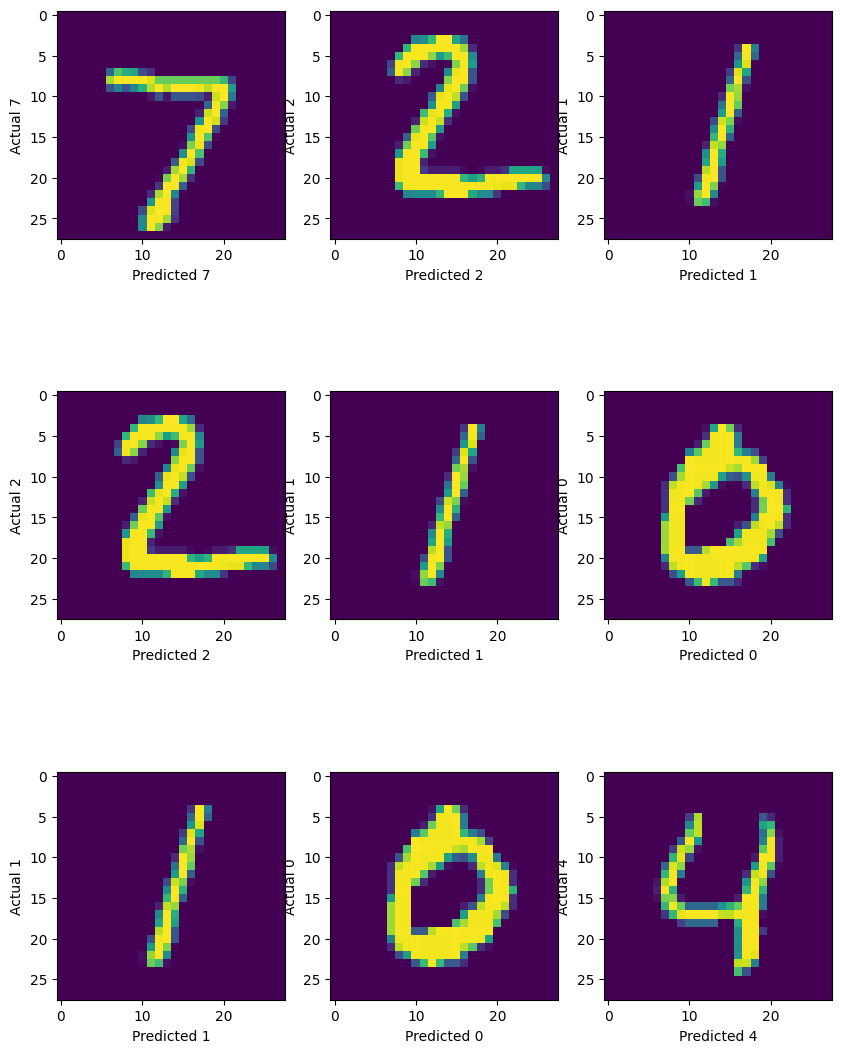

In [62]:
# Let's check out some Predictions
fig,ax = plt.subplots(figsize=(10,14),nrows=3,ncols=3)

for i in range(0,3):
  for j in range(0,3):
    ax[i][j].imshow(X_test[i+j].reshape(28,28))
    ax[i][j].set_xlabel(f"Predicted {predicted_label[i+j]}")
    ax[i][j].set_ylabel(f"Actual {Y_test[i+j]}")